# Memeriksa artikel dengan Python

## Masukan Jumlah Artikel, dan link artikel yang ingin di scraping

In [1]:
user = int(input("Berapa artikel yang ingin kamu periksa? :"))
link_artikel = []
for i in range(user):
    user2 = input(f"Masukan Link Artikel {i+1}:")
    link_artikel.append(user2)

Berapa artikel yang ingin kamu periksa? : 25
Masukan Link Artikel 1: https://caping.wordpress.com/2011/06/27/grrr/
Masukan Link Artikel 2: https://caping.wordpress.com/2011/04/11/melihat/
Masukan Link Artikel 3: https://caping.wordpress.com/2007/07/02/kotor/
Masukan Link Artikel 4: https://caping.wordpress.com/2007/06/25/yudhistira/
Masukan Link Artikel 5: https://caping.wordpress.com/2007/06/18/pilkada/
Masukan Link Artikel 6: https://caping.wordpress.com/2007/06/11/isis/
Masukan Link Artikel 7: https://caping.wordpress.com/2007/06/04/tentara/
Masukan Link Artikel 8: https://caping.wordpress.com/2007/05/28/makam/
Masukan Link Artikel 9: https://caping.wordpress.com/2007/05/21/sang-fundamentalis/
Masukan Link Artikel 10: https://caping.wordpress.com/2007/05/14/nuklir/
Masukan Link Artikel 11: https://caping.wordpress.com/2007/05/07/mall/
Masukan Link Artikel 12: https://caping.wordpress.com/2007/04/30/drupadi/
Masukan Link Artikel 13: https://caping.wordpress.com/2007/04/23/surat/
Masu

## Memilih menu 

In [2]:
for i in range(len(link_artikel)):
    print(f"{i+1}.Artikel {i+1}")
    
print(f"{len(link_artikel)+1}.Semua artikel.\n{len(link_artikel)+2}.Total Semua artikel.")
pilih_opsi = int(input("\nArtikel Mana yang ingin kamu periksa? :"))

1.Artikel 1
2.Artikel 2
3.Artikel 3
4.Artikel 4
5.Artikel 5
6.Artikel 6
7.Artikel 7
8.Artikel 8
9.Artikel 9
10.Artikel 10
11.Artikel 11
12.Artikel 12
13.Artikel 13
14.Artikel 14
15.Artikel 15
16.Artikel 16
17.Artikel 17
18.Artikel 18
19.Artikel 19
20.Artikel 20
21.Artikel 21
22.Artikel 22
23.Artikel 23
24.Artikel 24
25.Artikel 25
26.Semua artikel.
27.Total Semua artikel.



Artikel Mana yang ingin kamu periksa? : 26


## Membuat fungsi scraping 

In [3]:
import requests
from bs4 import BeautifulSoup

In [4]:
def is_valid_paragraph(p):
    if p.find_parent('div', id='comments'):
        return False

    if '~' in p.get_text(strip=True):
        return False

    if 'comment-form-comment' in p.get('class', []):
        return False

    return True

def extract_paragraphs(soup):
    paragraphs = []

    for p in soup.find_all('p'):
        if p.find_parent('div', id='content') or p.find_parent('div', class_='content'):
            if is_valid_paragraph(p):
                paragraphs.append(p)

    return paragraphs

In [5]:
def scraping(link_artikel):
    konten = {}
    url = link_artikel
    response = requests.get(url)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        
        if soup.find('h2'):
            title = soup.find('h2').get_text().lstrip()
            title = title.replace('\t', '\n')
        else:
            title = soup.find('h1').get_text().lstrip()
            title = title.replace('\t', '\n')
        
        valid_paragraphs = extract_paragraphs(soup)
        
        content = '\n'.join([p.get_text(strip=True) for p in valid_paragraphs])
        konten[title] = content
    else:
        return (response.status_code)
    return konten


In [6]:
def scraping_list(link_artikel):
    konten = {}
    for i in range(len(link_artikel)):
        url = link_artikel[i]
        
        response = requests.get(url)
        
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
        
            if soup.find('h2'):
                title = soup.find('h2').get_text().lstrip()
                title = title.replace('\t', '\n')
            else:
                title = soup.find('h1').get_text().lstrip()
                title = title.replace('\t', '\n')
            
            valid_paragraphs = extract_paragraphs(soup)
            
            content = '\n'.join([p.get_text(strip=True) for p in valid_paragraphs])
            konten[title] = content
        else:
            print("Gagal mengakses halaman:", response.status_code)
    return konten

## Fungsi Pilihan menu

In [7]:
def opsi(pilih_opsi):
    if pilih_opsi == (len(link_artikel)+2) or pilih_opsi == (len(link_artikel)+1):
        return scraping_list(link_artikel)
    else:
        return scraping(link_artikel[pilih_opsi-1])

In [8]:
data = opsi(pilih_opsi)

## Menampilkan judul dan isi artikel

In [9]:
for i in data:
    print('Judul Artikel :',i,'\nIsi Artikel:\n',data[i],'\n')

Judul Artikel : Grrr



Juni 27, 2011
 
Isi Artikel:
 Teater Mandiri pekan ini berumur 40 tahun—sebuah riwayat yang tak mudah, seperti hampir semua grup teater di Indonesia. Ia bagian dari sejarah Indonesia yang sebenarnya penting sebagai bagian dari cerita pem-bangun-an—”bangun” dalam arti jiwa yang tak lelap tertidur. Putu Wijaya, pendiri dan tiang utama teater ini, melihat peran pem-bangun-an ini sebagai ”teror”—dengan cara yang sederhana. Putu tak berseru, tak berpesan. Ia punya pendekatan tersendiri kepada kata.
Pada Putu Wijaya, kata adalah benda. Kata adalah materi yang punya volume di sebuah ruang, sebuah kombinasi bunyi dan imaji, sesuatu yang fisik yang menggebrak persepsi kita. Ia tak mengklaim satu makna. Ia tak berarti: tak punya isi kognitif atau tak punya manfaat yang besar.
Ini terutama hadir dalam teaternya—yang membuat Teater Mandiri akan dikenang sebagai contoh terbaik teater sebagai peristiwa, di mana sosok dan benda yang tak berarti dihadirkan. Mungkin sosok itu (u

## Fungsi untuk memberikan nama dan membuat file txt untuk artikel

In [10]:
def nama_artikel(pilih_opsi):
    if pilih_opsi == (len(link_artikel)+1):
        artikel = []
        for i in range(len(link_artikel)):
            nama_artikel = input(f"Masukan Nama File {i+1}:")
            nama_artikel += '.txt'
            artikel.append(nama_artikel)
        return artikel
    else:
        artikel = []
        nama_artikel = input("Masukan Nama File:")
        nama_artikel += '.txt'
        artikel.append(nama_artikel)
        return artikel

In [11]:
artikel_names = nama_artikel(pilih_opsi)

Masukan Nama File 1: grrr
Masukan Nama File 2: melihat
Masukan Nama File 3: kotor
Masukan Nama File 4: yudhistira
Masukan Nama File 5: pilkada
Masukan Nama File 6: isis
Masukan Nama File 7: tentara
Masukan Nama File 8: makam
Masukan Nama File 9: sang_fundamental
Masukan Nama File 10: nuklir
Masukan Nama File 11: mall
Masukan Nama File 12: drupadi
Masukan Nama File 13: surat
Masukan Nama File 14: jeremiah
Masukan Nama File 15: eropa
Masukan Nama File 16: akhir
Masukan Nama File 17: pagoda
Masukan Nama File 18: sutawijaya
Masukan Nama File 19: gandhi
Masukan Nama File 20: shanghai
Masukan Nama File 21: nasionalisme
Masukan Nama File 22: babel
Masukan Nama File 23: banjir
Masukan Nama File 24: hujan
Masukan Nama File 25: konstitusi


## Memasukan isi kedalam file txt

In [12]:
x = 0
if pilih_opsi != (len(link_artikel)+1): 
    for i in data:
        with open(artikel_names[0], 'a', encoding='utf-8') as file:
            file.write(data[i])
else:
    for i in data:
        with open(artikel_names[x], 'a', encoding='utf-8') as file:
            file.write(data[i])
            x +=1

## Fungsi Menghitung Jumlah Paragraf

In [13]:
def jml_paragraf(artikel_names):
    EOF_artikel = {}
    for i in artikel_names:
        with open(i, 'r', encoding='utf-8') as file:
            jmlh_paragraf = sum(1 for line in file if line.strip())
        EOF_artikel[i] = jmlh_paragraf
    return EOF_artikel

### Menampilkan hasil

In [14]:
jml =[]
paragraf = jml_paragraf(artikel_names)

for key,value in paragraf.items():
    print(f"Jumlah Paragraf pada {key} adalah {value} paragraf")
    jml.append(value)
print(f"\nRata-rata jumlah paragraf sekitar: {sum(jml)/len(jml)} paragraf")

Jumlah Paragraf pada grrr.txt adalah 13 paragraf
Jumlah Paragraf pada melihat.txt adalah 15 paragraf
Jumlah Paragraf pada kotor.txt adalah 15 paragraf
Jumlah Paragraf pada yudhistira.txt adalah 27 paragraf
Jumlah Paragraf pada pilkada.txt adalah 15 paragraf
Jumlah Paragraf pada isis.txt adalah 14 paragraf
Jumlah Paragraf pada tentara.txt adalah 16 paragraf
Jumlah Paragraf pada makam.txt adalah 16 paragraf
Jumlah Paragraf pada sang_fundamental.txt adalah 15 paragraf
Jumlah Paragraf pada nuklir.txt adalah 15 paragraf
Jumlah Paragraf pada mall.txt adalah 18 paragraf
Jumlah Paragraf pada drupadi.txt adalah 14 paragraf
Jumlah Paragraf pada surat.txt adalah 21 paragraf
Jumlah Paragraf pada jeremiah.txt adalah 22 paragraf
Jumlah Paragraf pada eropa.txt adalah 20 paragraf
Jumlah Paragraf pada akhir.txt adalah 21 paragraf
Jumlah Paragraf pada pagoda.txt adalah 21 paragraf
Jumlah Paragraf pada sutawijaya.txt adalah 17 paragraf
Jumlah Paragraf pada gandhi.txt adalah 21 paragraf
Jumlah Paragraf pa

## Fungsi Menghitung jumlah kalimat

In [15]:
def kalimat(teks):
    txt = teks.lower()
    txt_nospacing = txt.replace(" ","")
    sentence_count = 0
    for i in range(len(txt_nospacing)-1):
        if txt_nospacing[i] == "." or txt_nospacing[i] == "?" or txt_nospacing[i] == "!":
            if txt_nospacing[i] != ".":
                if txt_nospacing[i+1] != '"':
                    sentence_count += 1
            else:
                sentence_count += 1
    return sentence_count

### Menampilkan hasil

In [16]:
jml = []
for i in artikel_names:
    with open(i, 'r', encoding='utf-8') as file:
        jml_kalimat = kalimat(file.read())
        print(f"Jumlah kalimat pada {i}: {jml_kalimat} kalimat")
        jml.append(jml_kalimat)

print(f"\nRata-rata jumlah kalimat sekitar: {sum(jml)/len(jml)} kalimat")

Jumlah kalimat pada grrr.txt: 49 kalimat
Jumlah kalimat pada melihat.txt: 64 kalimat
Jumlah kalimat pada kotor.txt: 58 kalimat
Jumlah kalimat pada yudhistira.txt: 86 kalimat
Jumlah kalimat pada pilkada.txt: 44 kalimat
Jumlah kalimat pada isis.txt: 44 kalimat
Jumlah kalimat pada tentara.txt: 54 kalimat
Jumlah kalimat pada makam.txt: 44 kalimat
Jumlah kalimat pada sang_fundamental.txt: 46 kalimat
Jumlah kalimat pada nuklir.txt: 40 kalimat
Jumlah kalimat pada mall.txt: 42 kalimat
Jumlah kalimat pada drupadi.txt: 57 kalimat
Jumlah kalimat pada surat.txt: 64 kalimat
Jumlah kalimat pada jeremiah.txt: 68 kalimat
Jumlah kalimat pada eropa.txt: 50 kalimat
Jumlah kalimat pada akhir.txt: 69 kalimat
Jumlah kalimat pada pagoda.txt: 62 kalimat
Jumlah kalimat pada sutawijaya.txt: 49 kalimat
Jumlah kalimat pada gandhi.txt: 55 kalimat
Jumlah kalimat pada shanghai.txt: 52 kalimat
Jumlah kalimat pada nasionalisme.txt: 48 kalimat
Jumlah kalimat pada babel.txt: 63 kalimat
Jumlah kalimat pada banjir.txt: 45

## Fungsi Membersihkan teks

In [19]:
import re 
def cleaning_teks(teks):
    teks_bersih = re.sub(r'[^\w\s]', '', teks)
    teks_bersih = re.sub(r'[“”\'\"?Δ]', '', teks_bersih) 
    teks_bersih = re.sub(r'\s+', ' ', teks_bersih).strip()
    return teks_bersih

## Mengganti isi yang belum bersih, dengan isi yang sudah di bersihkan

In [20]:
x = 0
if pilih_opsi != (len(link_artikel)+1): 
    for i in data:
        with open(artikel_names[0], 'w', encoding='utf-8') as file:
            cleaned = cleaning_teks(data[i])
            file.write(cleaned)
else:
    for i in data:
        with open(artikel_names[x], 'w', encoding='utf-8') as file:
            cleaned = cleaning_teks(data[i])
            file.write(cleaned)
            x +=1

## Menghitung jumlah keseluruhan kata

In [21]:
jml = []
konten = []
for i in artikel_names:
    with open(i, "r", encoding="utf-8") as file:
        content = file.read()
        konten.append(content)
    txt_count = len(content.split())
    print(f"Jumlah total kata pada {i} keseluruhan ada:{txt_count}")
    jml.append(txt_count)

print(f"\nRata-rata jumlah total kata sekitar: {sum(jml)/len(jml)} total kata")

Jumlah total kata pada grrr.txt keseluruhan ada:751
Jumlah total kata pada melihat.txt keseluruhan ada:779
Jumlah total kata pada kotor.txt keseluruhan ada:801
Jumlah total kata pada yudhistira.txt keseluruhan ada:815
Jumlah total kata pada pilkada.txt keseluruhan ada:775
Jumlah total kata pada isis.txt keseluruhan ada:794
Jumlah total kata pada tentara.txt keseluruhan ada:789
Jumlah total kata pada makam.txt keseluruhan ada:778
Jumlah total kata pada sang_fundamental.txt keseluruhan ada:768
Jumlah total kata pada nuklir.txt keseluruhan ada:796
Jumlah total kata pada mall.txt keseluruhan ada:855
Jumlah total kata pada drupadi.txt keseluruhan ada:655
Jumlah total kata pada surat.txt keseluruhan ada:787
Jumlah total kata pada jeremiah.txt keseluruhan ada:815
Jumlah total kata pada eropa.txt keseluruhan ada:827
Jumlah total kata pada akhir.txt keseluruhan ada:816
Jumlah total kata pada pagoda.txt keseluruhan ada:789
Jumlah total kata pada sutawijaya.txt keseluruhan ada:807
Jumlah total ka

## Fungsi menghitung unique word

In [22]:
def kata_unik(teks):
    txt = teks.lower()
    txt = txt.split()
    kata_unik = []
    for i in txt:
        if i not in kata_unik:
            kata_unik.append(i)
    return len(kata_unik)

### Menampilkan hasil

In [23]:
jml=[]
for i in range(len(artikel_names)):
    jumlah_kata = kata_unik(konten[i])
    print(f"jumlah kata berbeda pada {artikel_names[i]}:{jumlah_kata} kata")
    jml.append(jumlah_kata)

print(f"\nRata-rata jumlah kata berbeda sekitar: {sum(jml)/len(jml)} kata")

jumlah kata berbeda pada grrr.txt:355 kata
jumlah kata berbeda pada melihat.txt:427 kata
jumlah kata berbeda pada kotor.txt:416 kata
jumlah kata berbeda pada yudhistira.txt:365 kata
jumlah kata berbeda pada pilkada.txt:394 kata
jumlah kata berbeda pada isis.txt:460 kata
jumlah kata berbeda pada tentara.txt:400 kata
jumlah kata berbeda pada makam.txt:409 kata
jumlah kata berbeda pada sang_fundamental.txt:387 kata
jumlah kata berbeda pada nuklir.txt:398 kata
jumlah kata berbeda pada mall.txt:396 kata
jumlah kata berbeda pada drupadi.txt:362 kata
jumlah kata berbeda pada surat.txt:404 kata
jumlah kata berbeda pada jeremiah.txt:484 kata
jumlah kata berbeda pada eropa.txt:444 kata
jumlah kata berbeda pada akhir.txt:417 kata
jumlah kata berbeda pada pagoda.txt:434 kata
jumlah kata berbeda pada sutawijaya.txt:433 kata
jumlah kata berbeda pada gandhi.txt:401 kata
jumlah kata berbeda pada shanghai.txt:470 kata
jumlah kata berbeda pada nasionalisme.txt:405 kata
jumlah kata berbeda pada babel.txt

## Memvisualisasikan Frekuensi kata

In [24]:
from collections import Counter
import re
import matplotlib.pyplot as plt

In [ ]:
for i in range(len(artikel_names)):
    words = konten[i].split()
    word_freq = Counter(words)
    
    top_words = word_freq.most_common(20)
    
    plt.figure(figsize=(8, 4))
    plt.bar(*zip(*top_words), color='skyblue')
    plt.title(f"Top 20 Kata Paling Sering Muncul pada {artikel_names[i]}", fontsize=12)
    plt.xlabel("Kata", fontsize=10)
    plt.ylabel("Frekuensi", fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

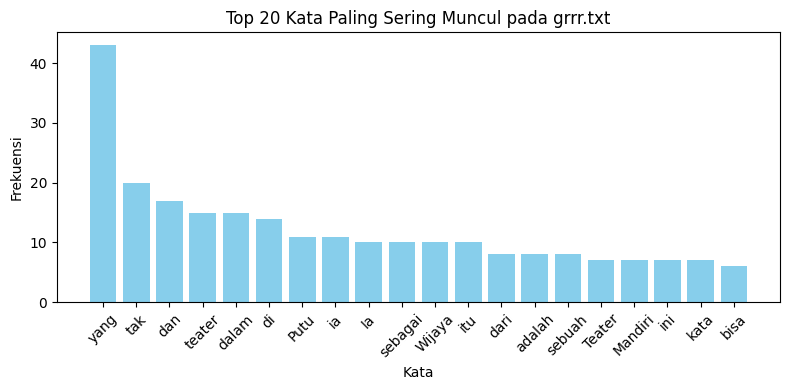

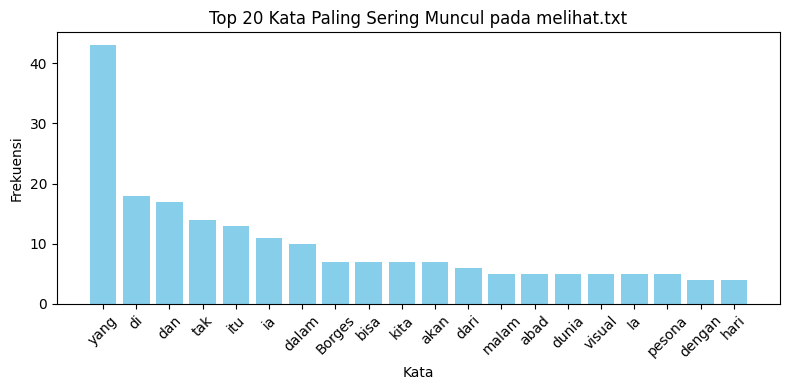

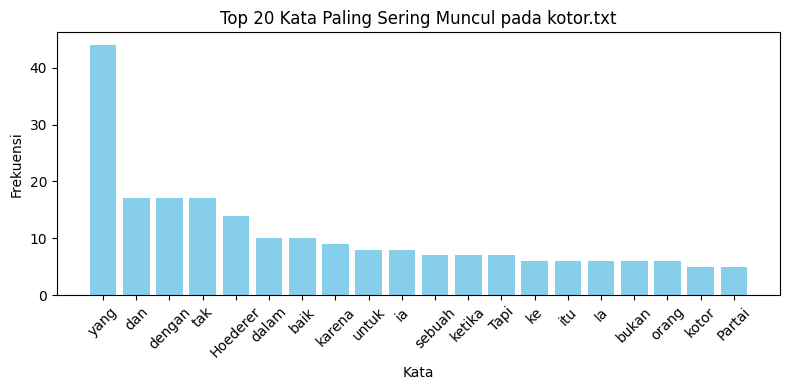

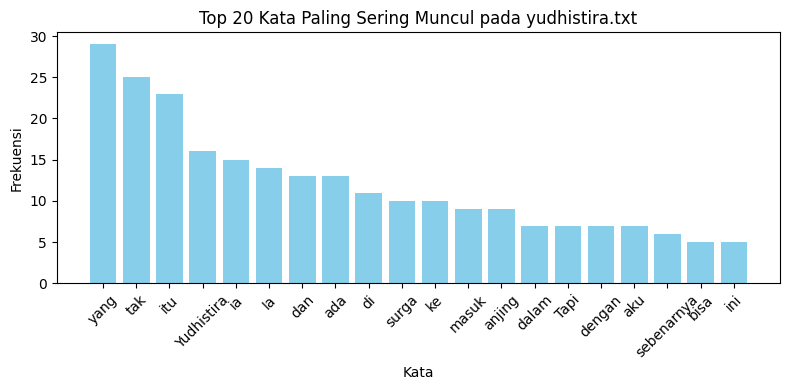

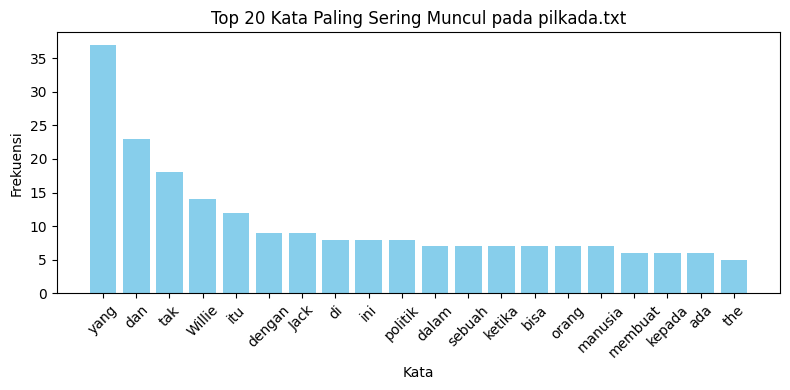

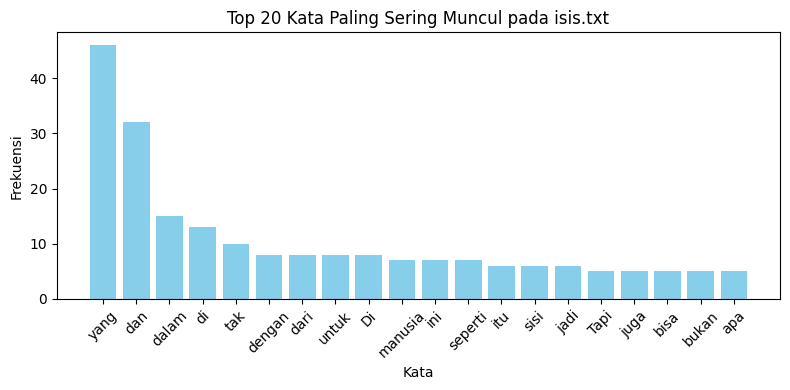

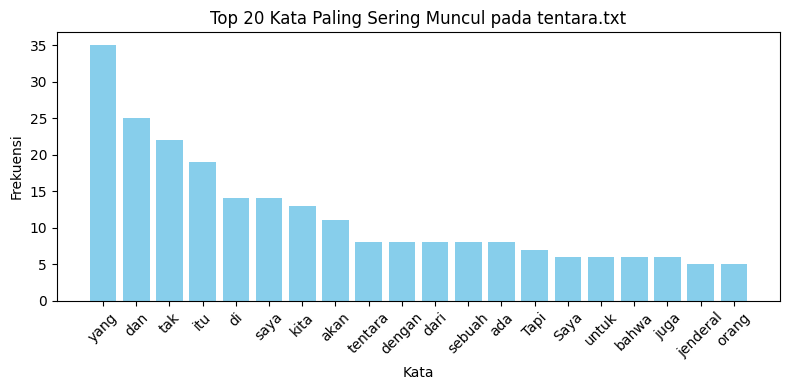

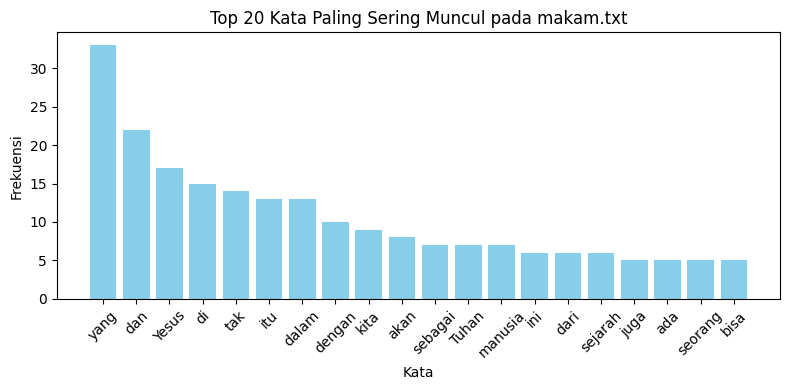

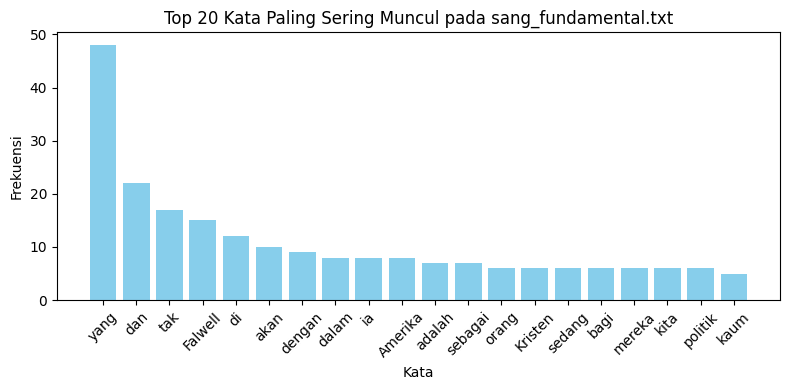

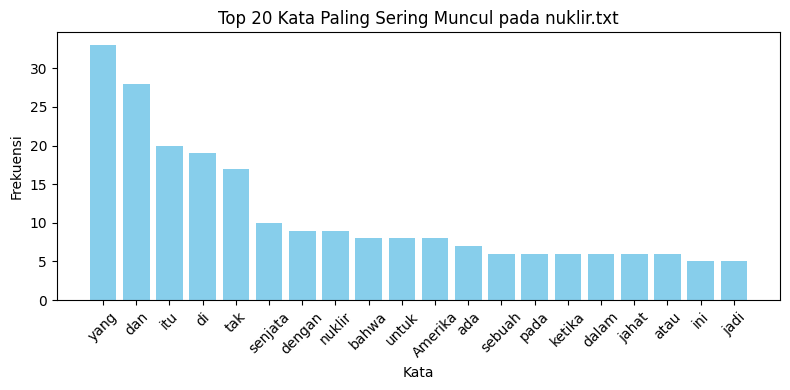

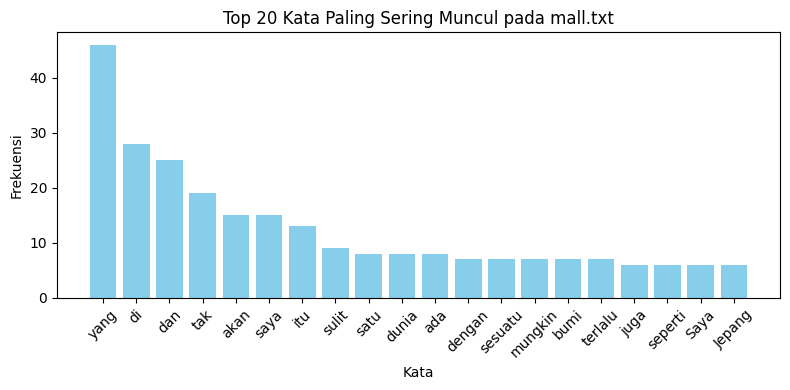

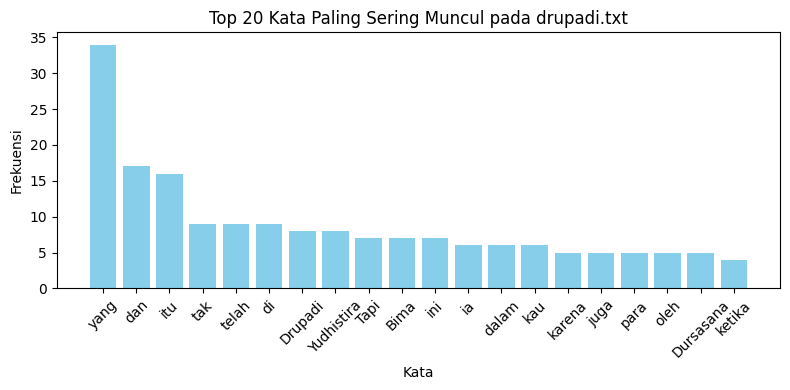

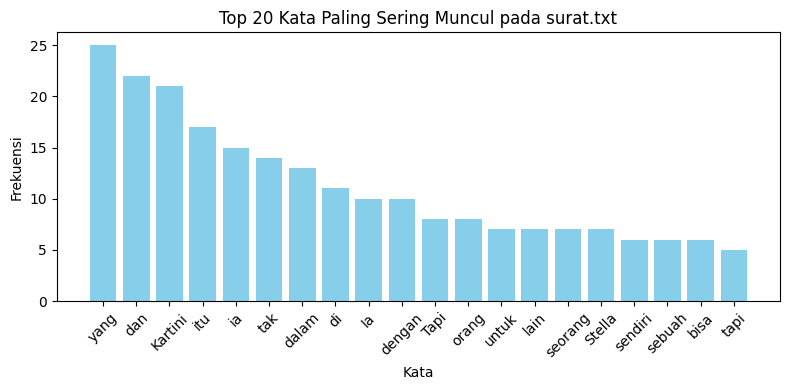

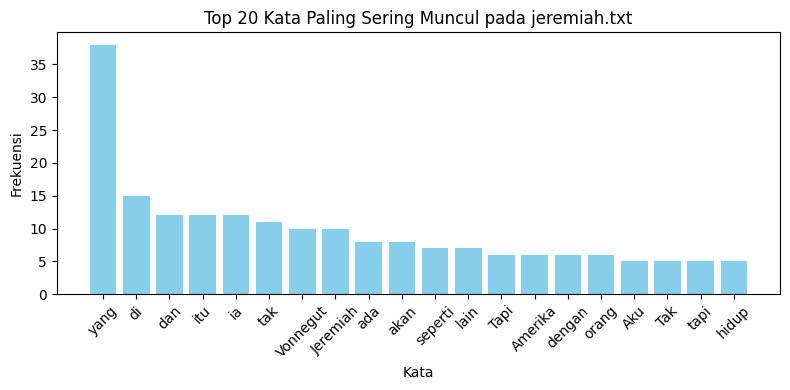

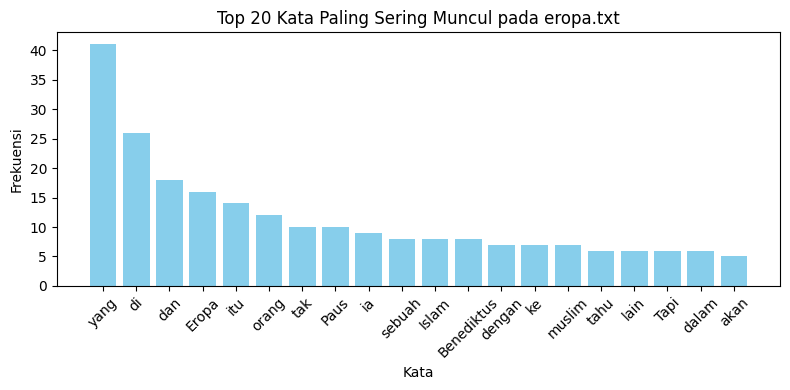

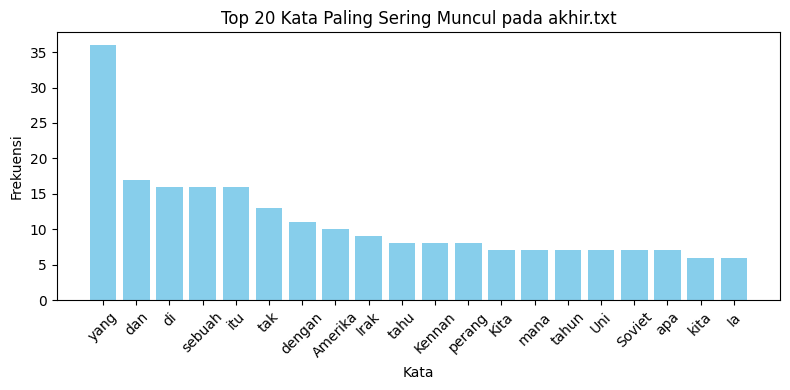

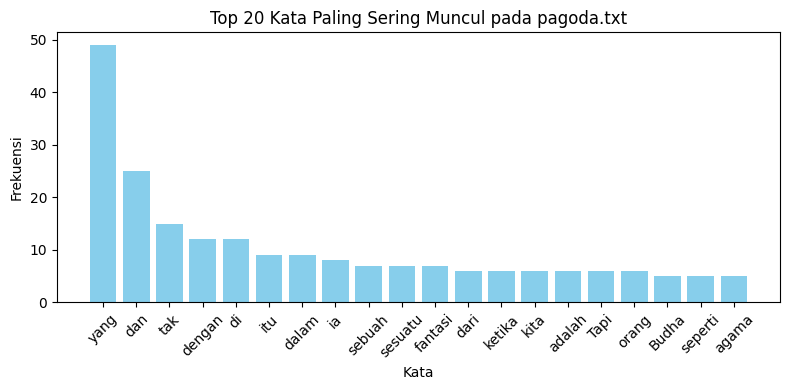

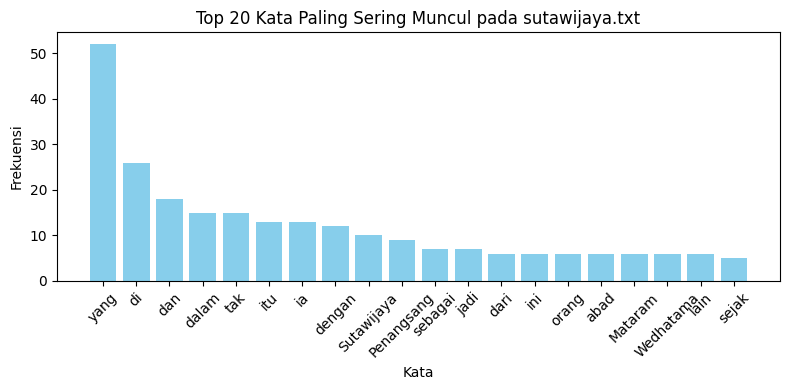

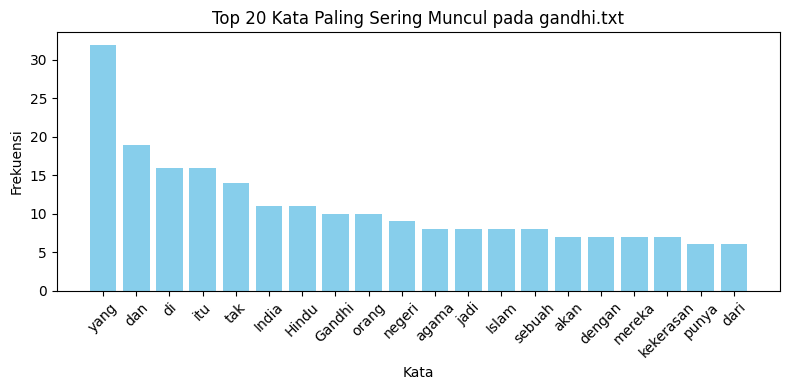

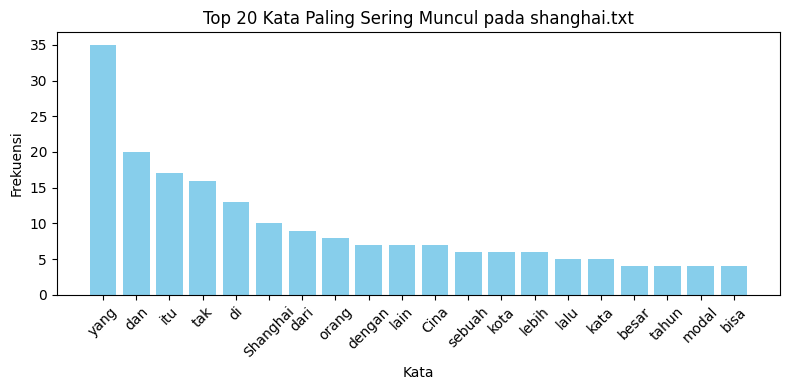

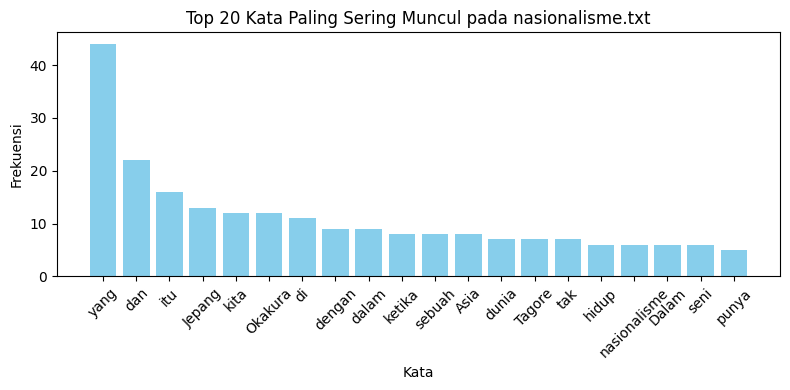

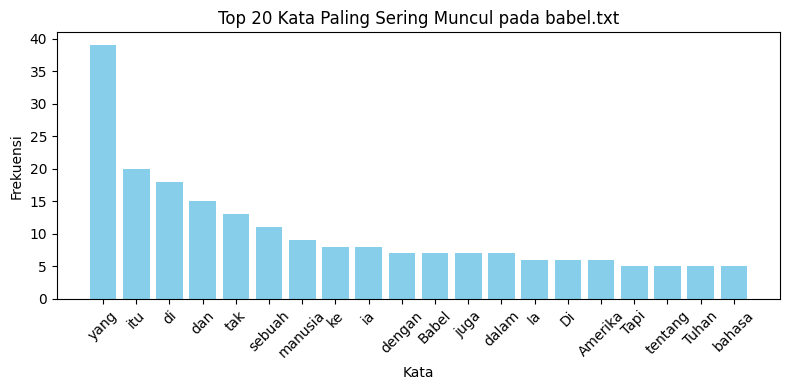

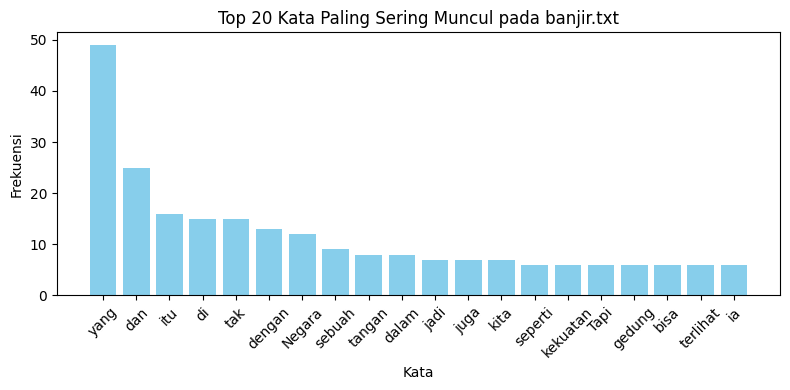

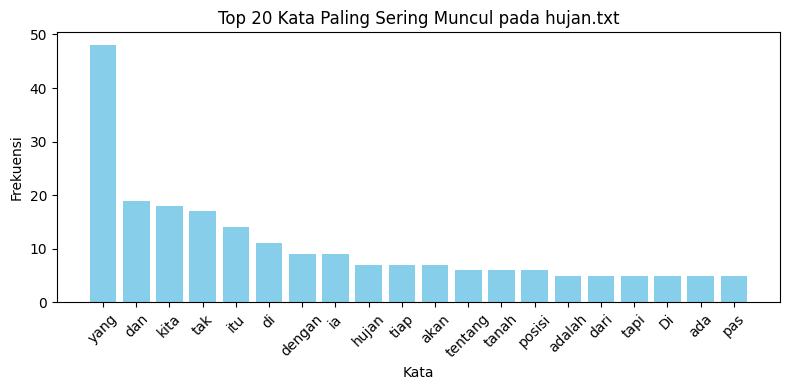

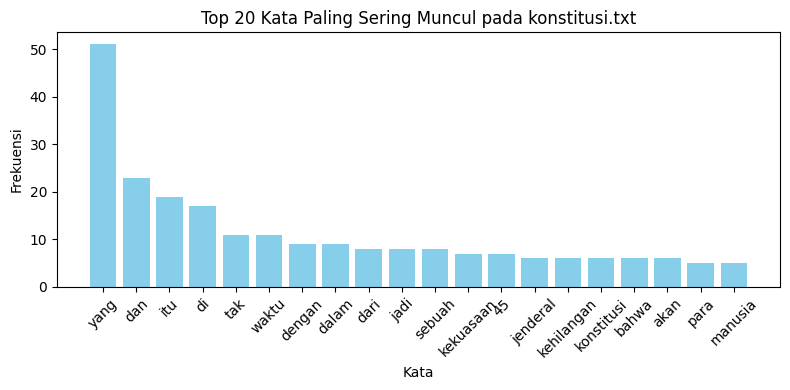

## Menghitung jumlah huruf

In [27]:
modus_abjad = []
for i in range(len(artikel_names)):
    alphabet_freq = Counter(char.lower() for char in konten[i] if char.isalpha())
    modus_abjad.append(alphabet_freq)

In [28]:
def jumlah_huruf(abjad):
    total_huruf = 0
    for key,value in abjad.items():
        total_huruf += value
    return total_huruf

### Menampilkan hasil

In [29]:
jml=[]
for i in range(len(artikel_names)):
    huruf = jumlah_huruf(modus_abjad[i])
    print(f"jumlah keseluruhan huruf pada {artikel_names[i]} : {huruf} huruf")
    jml.append(huruf)
print(f"\nRata-rata jumlah huruf sekitar:{sum(jml)/len(jml)} huruf")

jumlah keseluruhan huruf pada grrr.txt : 4289 huruf
jumlah keseluruhan huruf pada melihat.txt : 4458 huruf
jumlah keseluruhan huruf pada kotor.txt : 4757 huruf
jumlah keseluruhan huruf pada yudhistira.txt : 4690 huruf
jumlah keseluruhan huruf pada pilkada.txt : 4566 huruf
jumlah keseluruhan huruf pada isis.txt : 4760 huruf
jumlah keseluruhan huruf pada tentara.txt : 4600 huruf
jumlah keseluruhan huruf pada makam.txt : 4657 huruf
jumlah keseluruhan huruf pada sang_fundamental.txt : 4561 huruf
jumlah keseluruhan huruf pada nuklir.txt : 4604 huruf
jumlah keseluruhan huruf pada mall.txt : 4660 huruf
jumlah keseluruhan huruf pada drupadi.txt : 3865 huruf
jumlah keseluruhan huruf pada surat.txt : 4710 huruf
jumlah keseluruhan huruf pada jeremiah.txt : 4712 huruf
jumlah keseluruhan huruf pada eropa.txt : 4679 huruf
jumlah keseluruhan huruf pada akhir.txt : 4662 huruf
jumlah keseluruhan huruf pada pagoda.txt : 4669 huruf
jumlah keseluruhan huruf pada sutawijaya.txt : 4722 huruf
jumlah keseluru

## Memvisualisasikan Frekuensi huruf

In [ ]:
for i in range(len(artikel_names)):
    letters, letter_counts = zip(*sorted(modus_abjad[i].items()))
    
    plt.figure(figsize=(8, 4))
    plt.bar(letters, letter_counts, color='salmon')
    plt.title(f"Frekuensi Kemunculan Huruf 

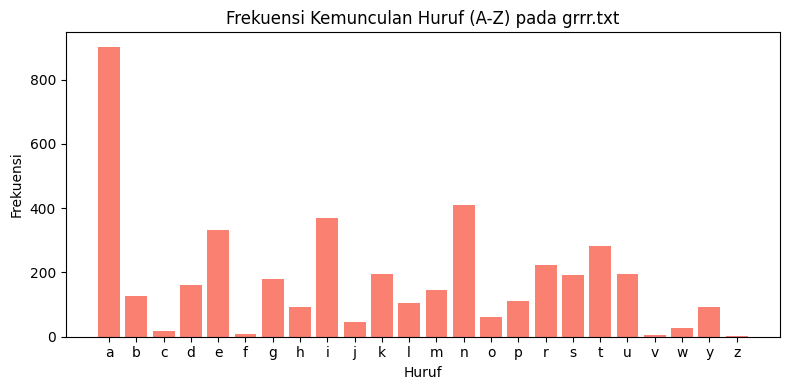

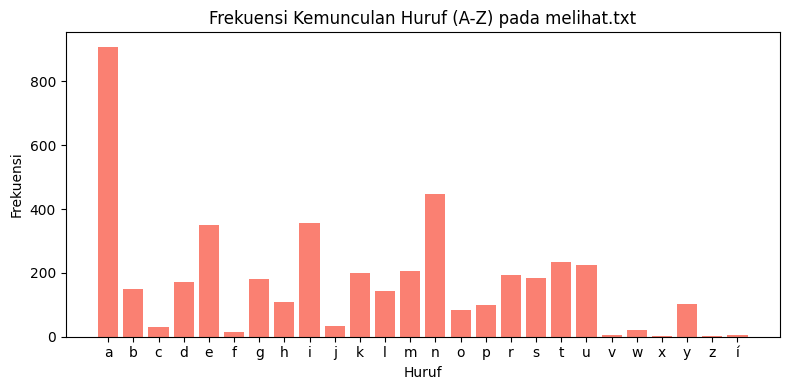

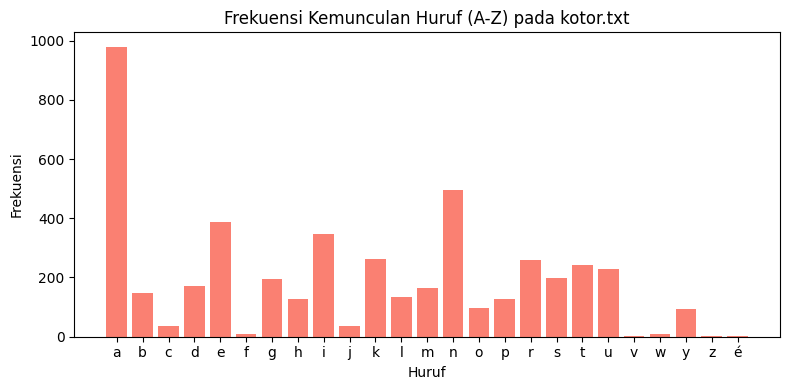

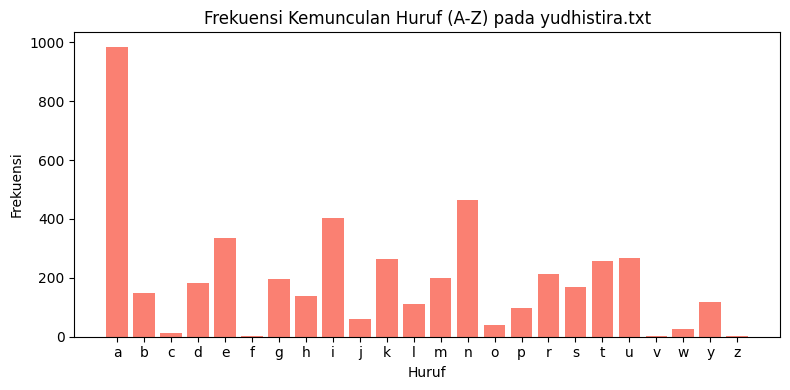

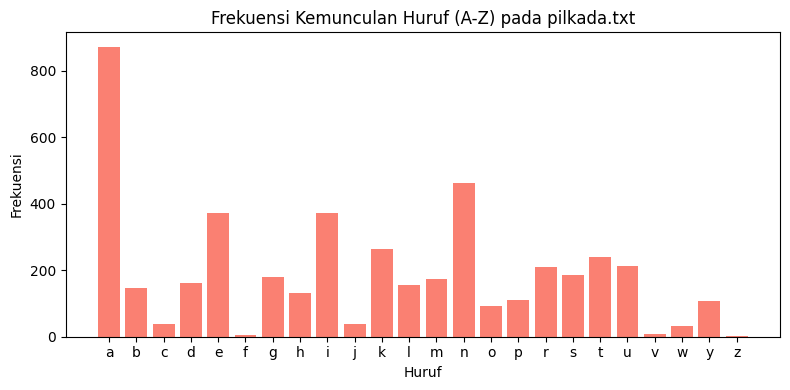

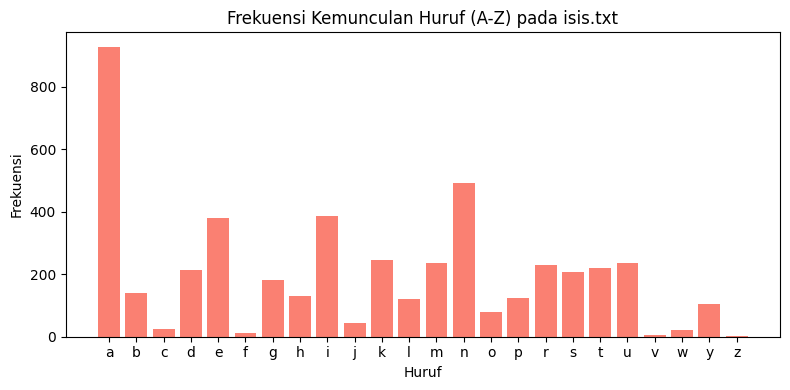

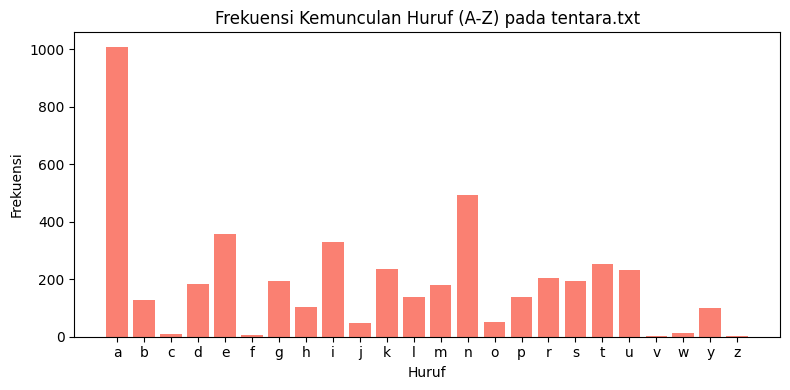

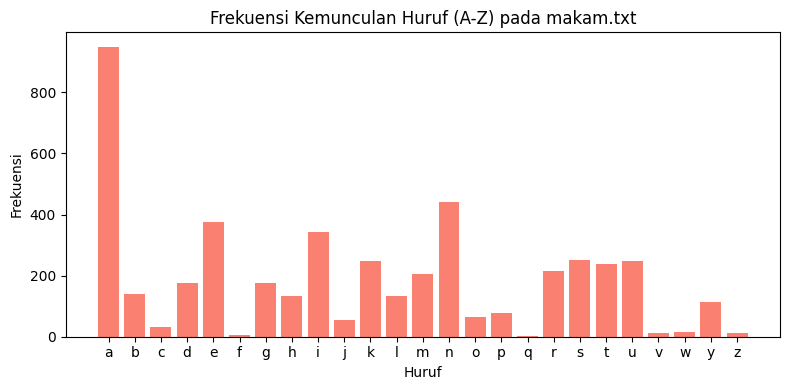

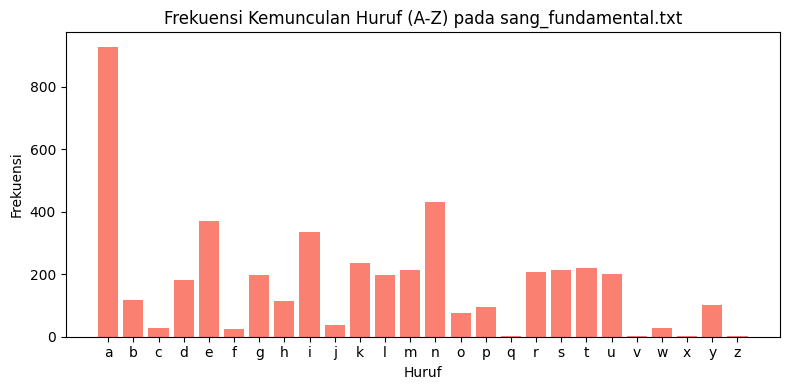

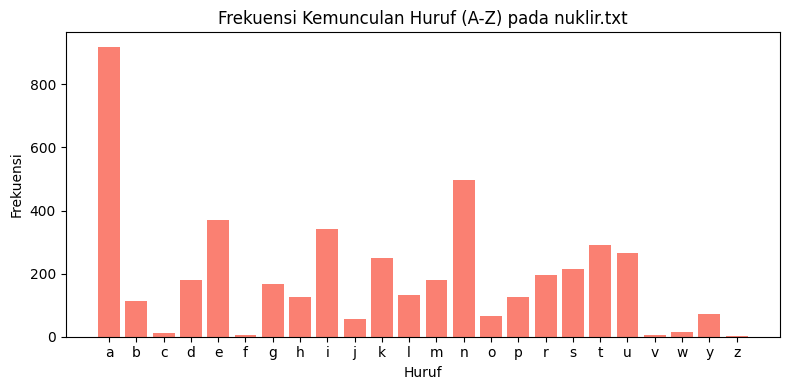

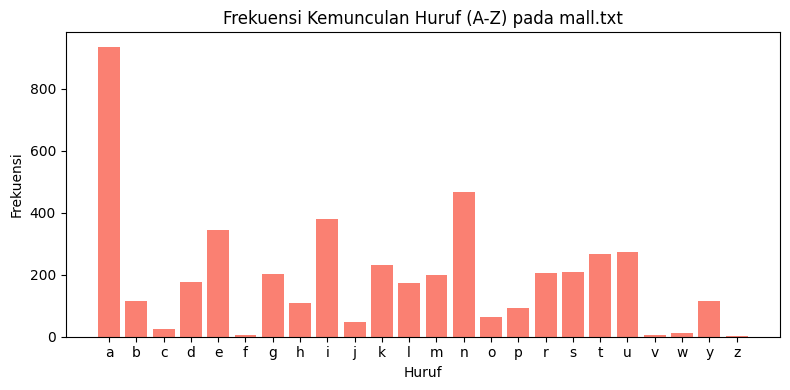

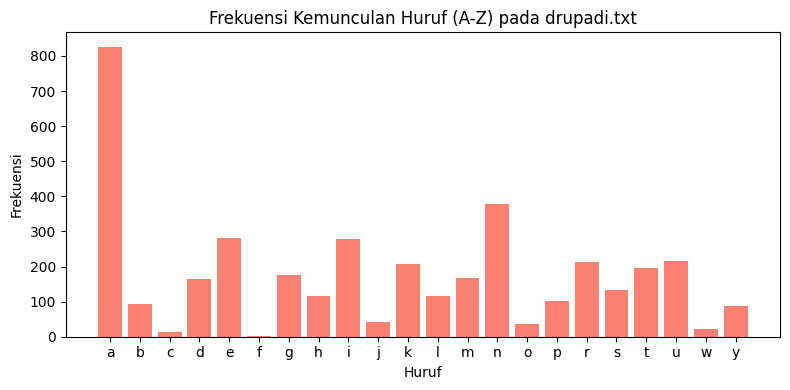

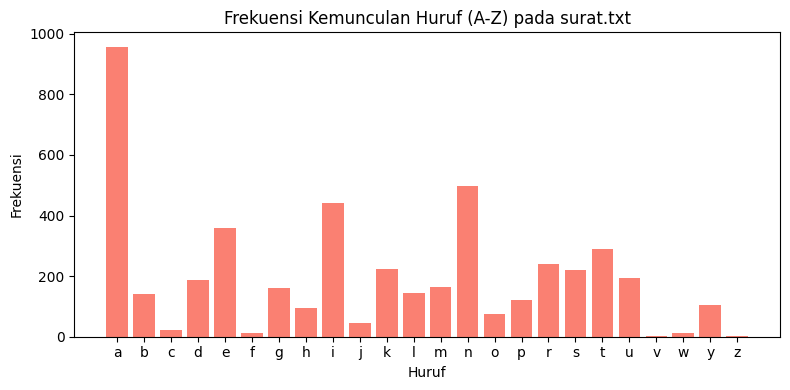

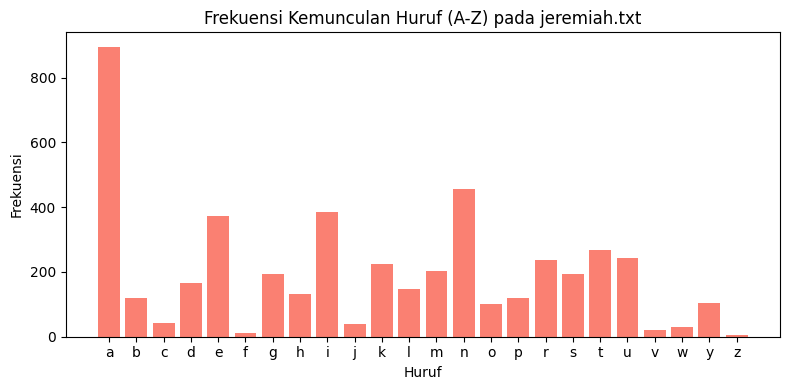

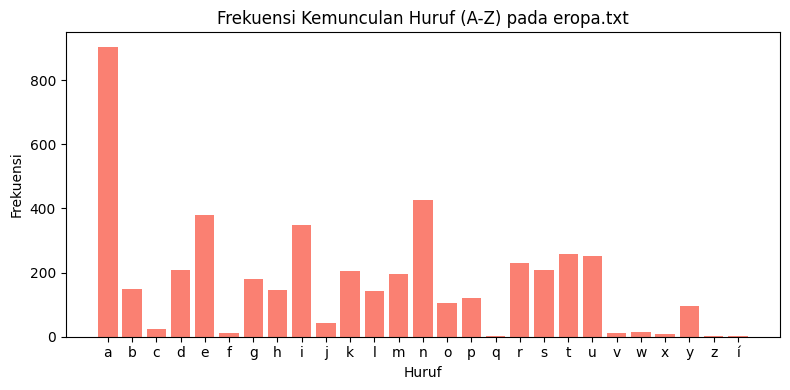

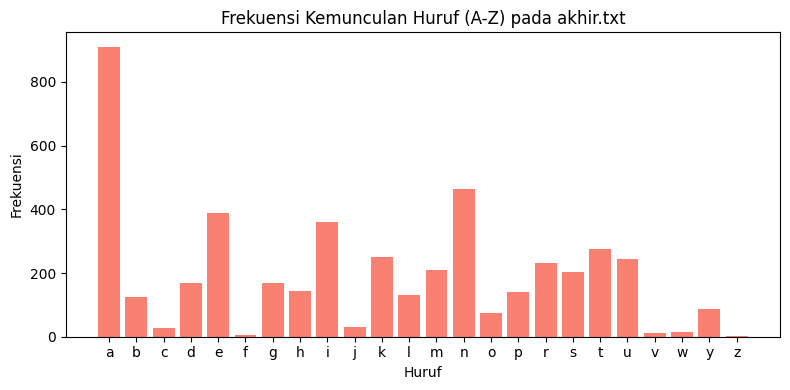

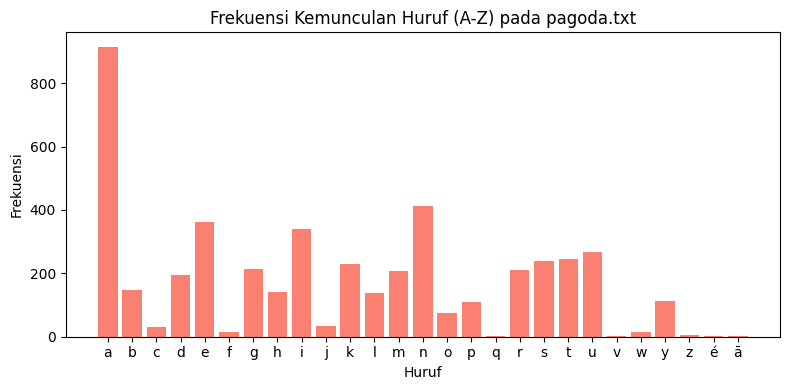

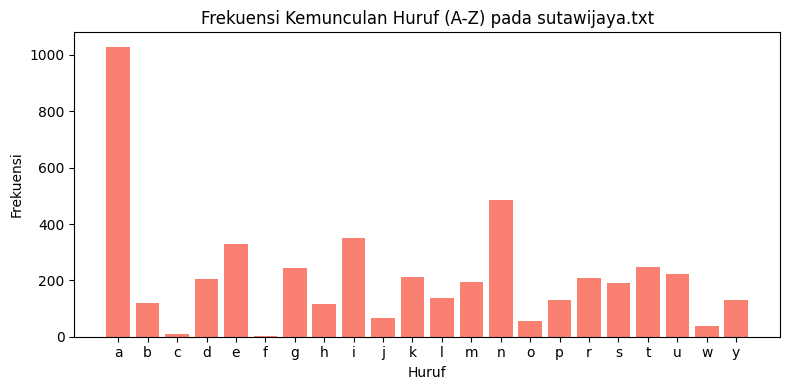

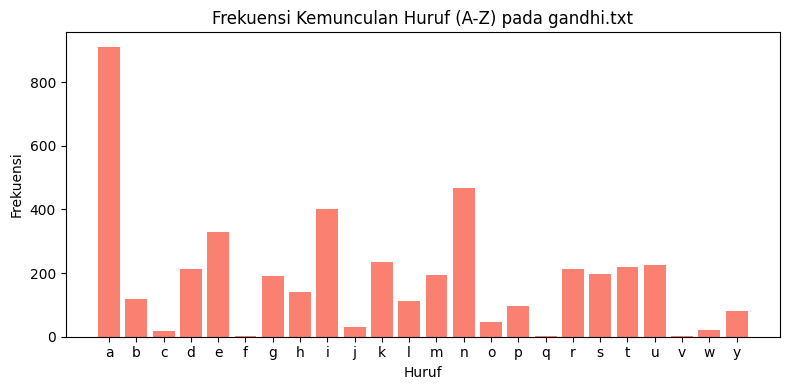

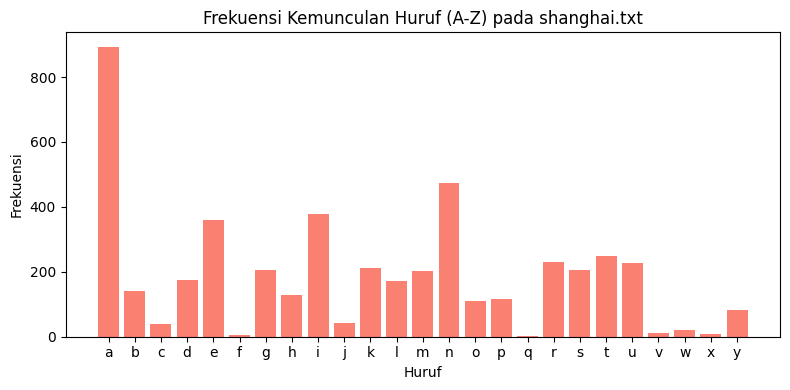

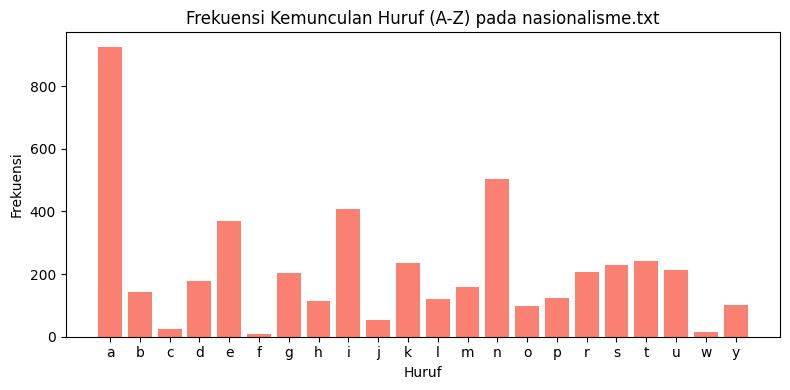

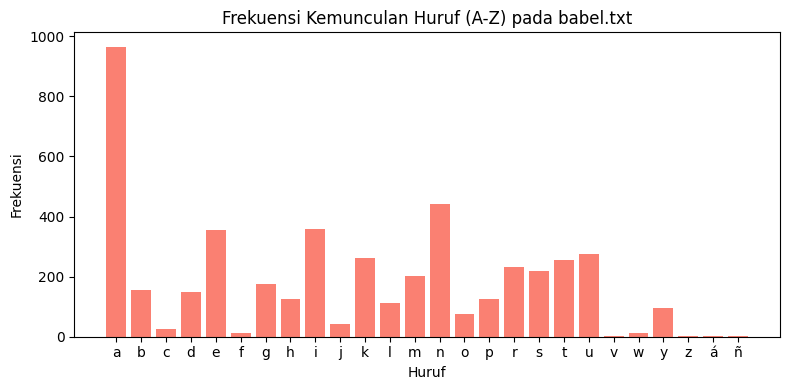

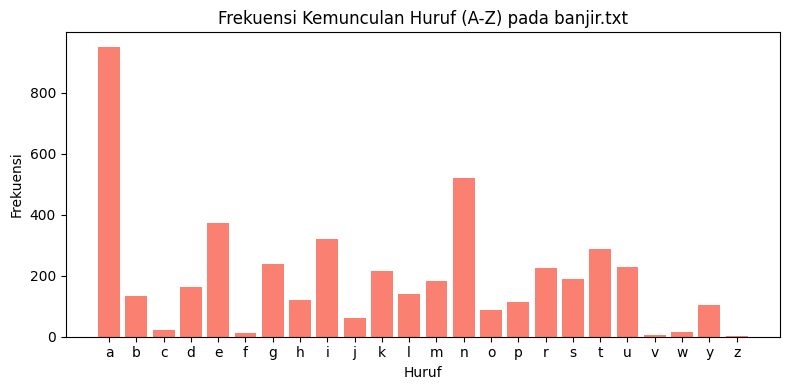

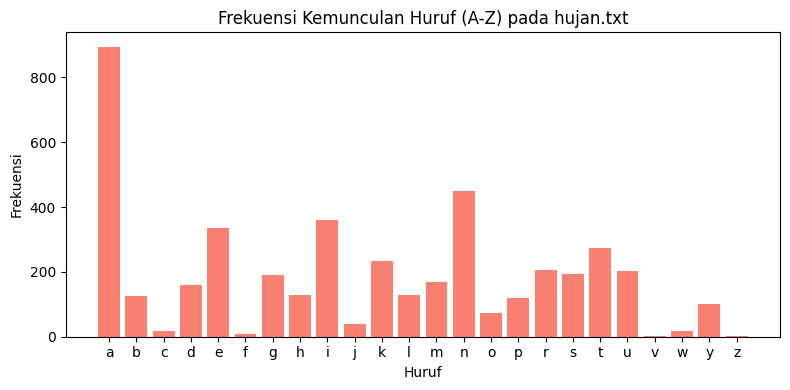

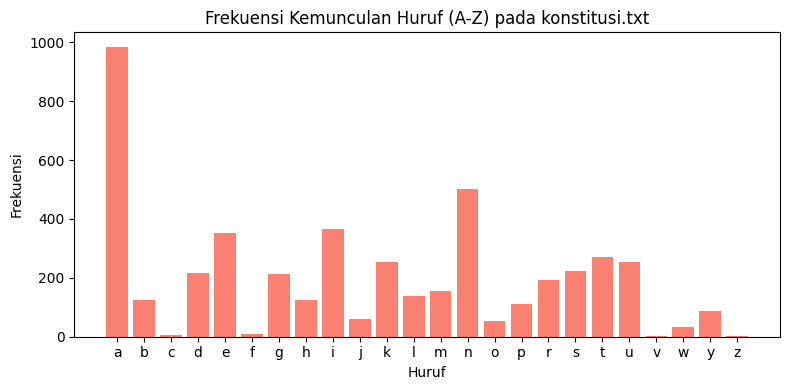

In [ ]:
(A-Z) pada {artikel_names[i]}", fontsize=12)
    plt.xlabel("Huruf", fontsize=10)
    plt.ylabel("Frekuensi", fontsize=10)
    plt.tight_layout()
    plt.show()

In [ ]:
for i in range(len(artikel_names)):

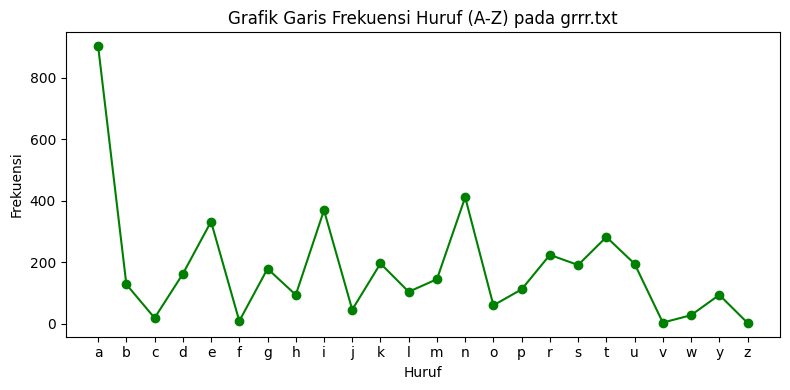

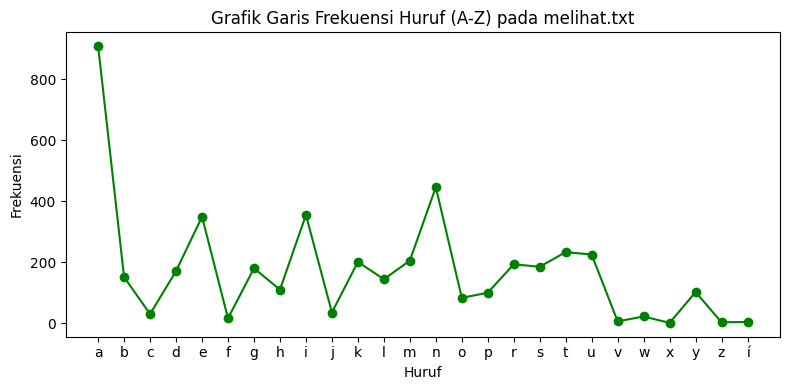

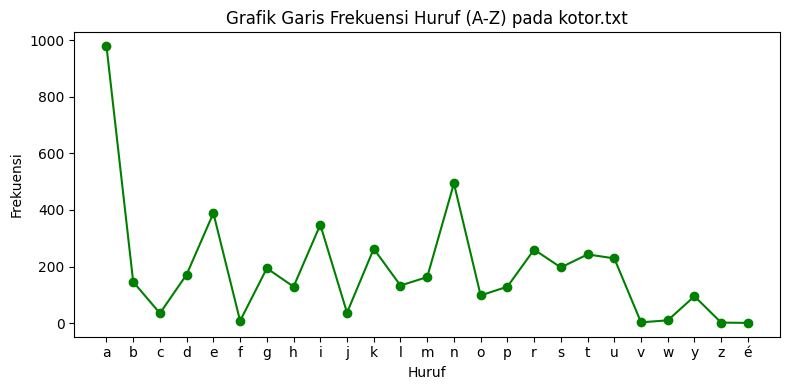

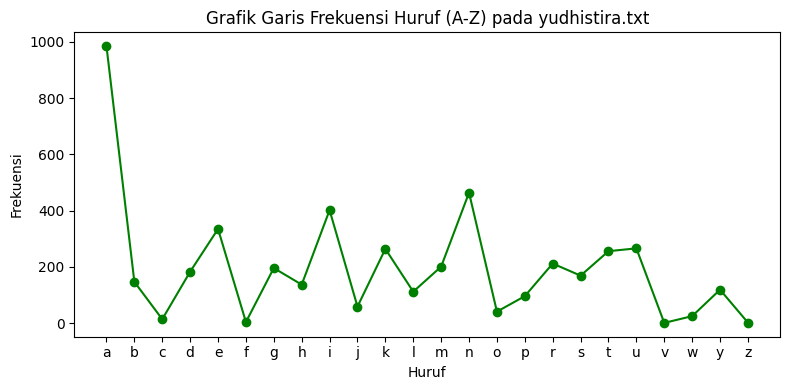

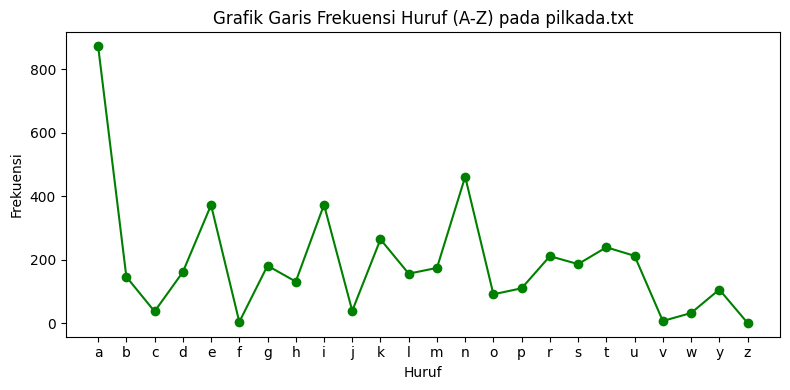

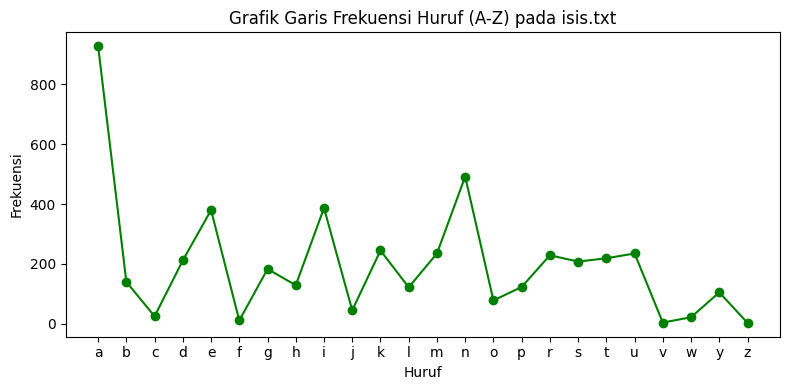

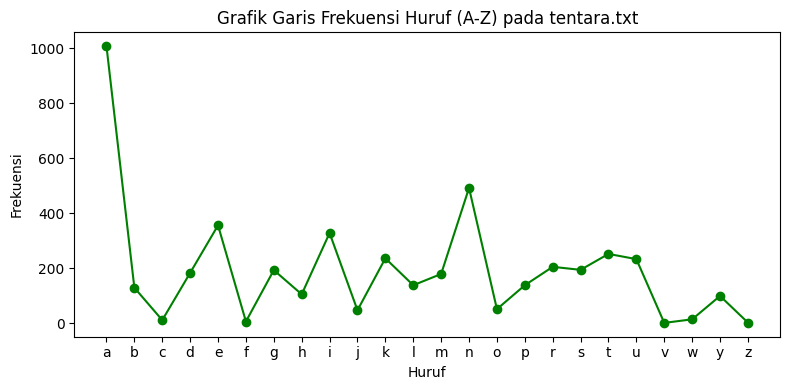

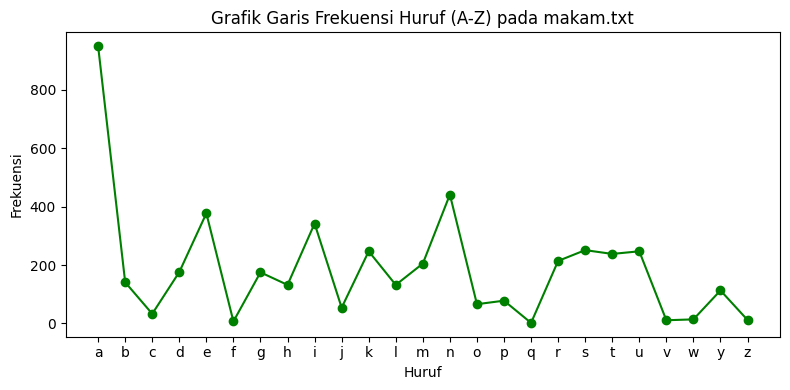

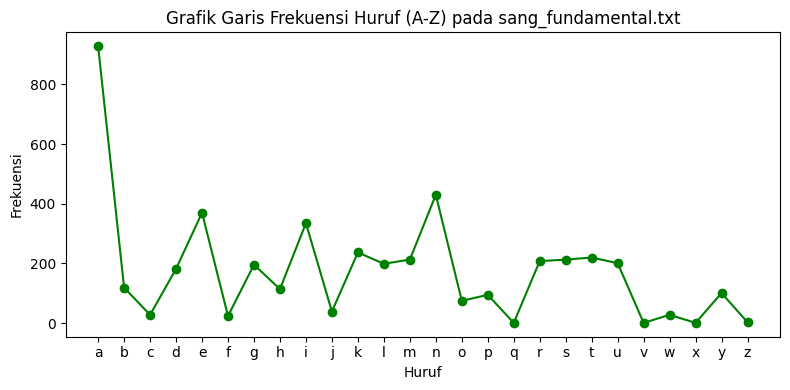

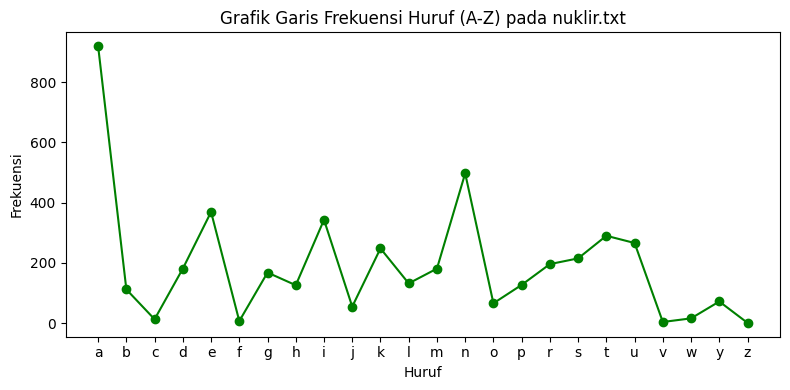

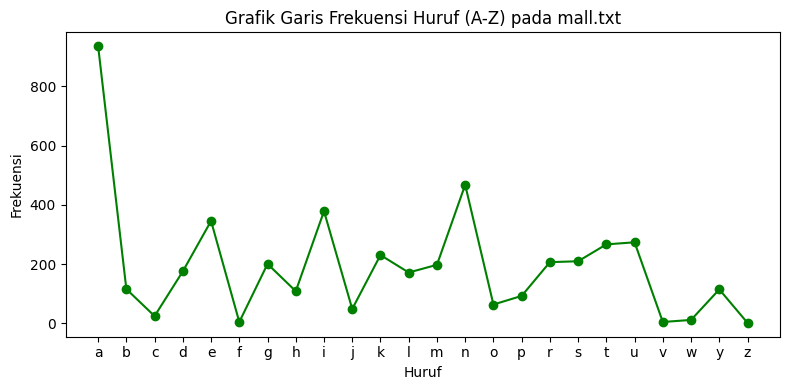

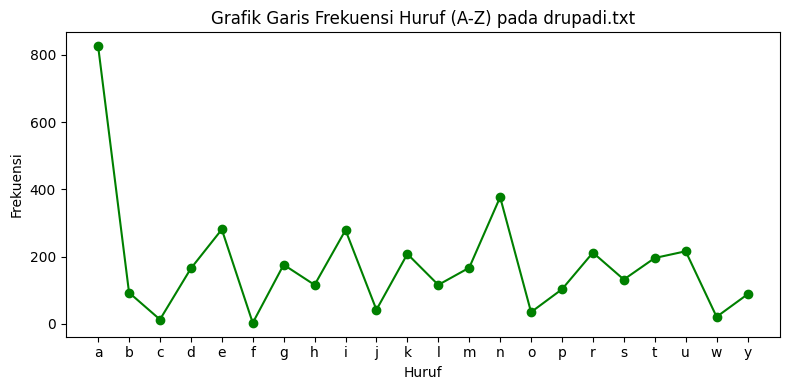

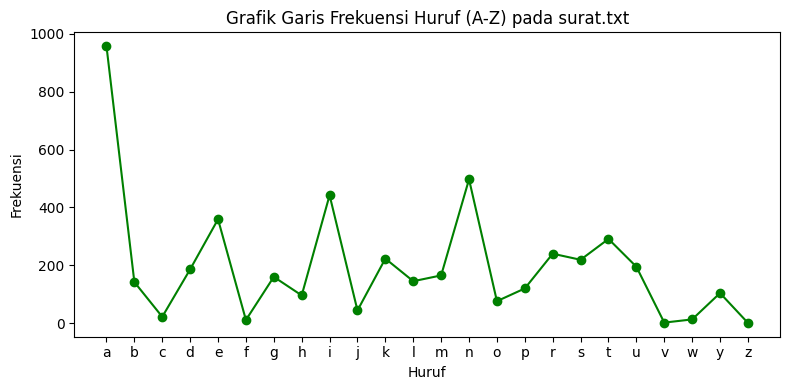

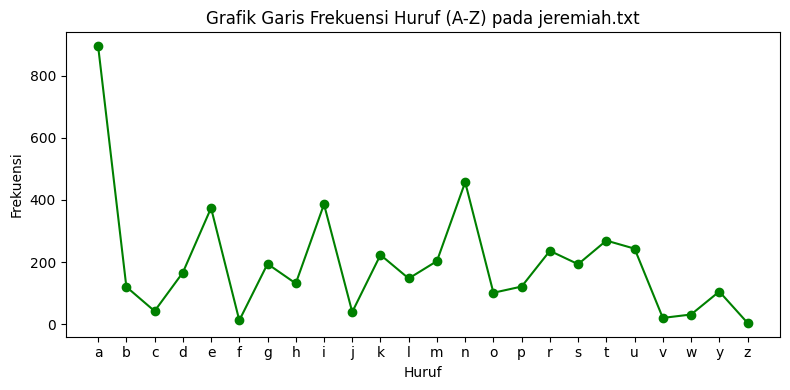

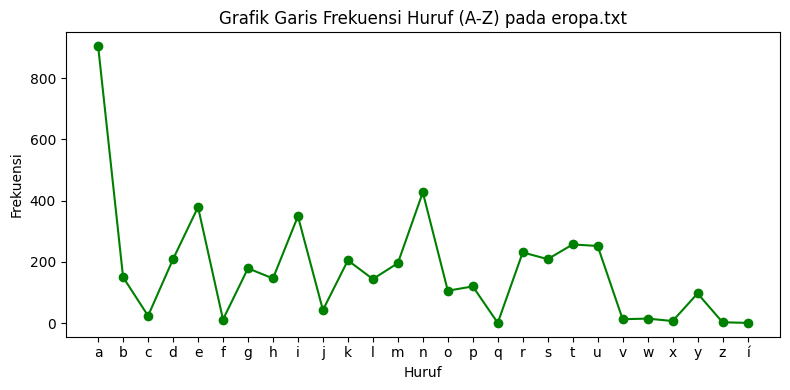

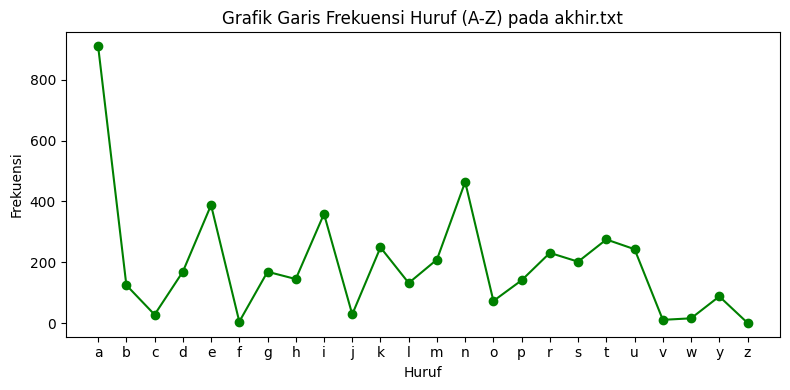

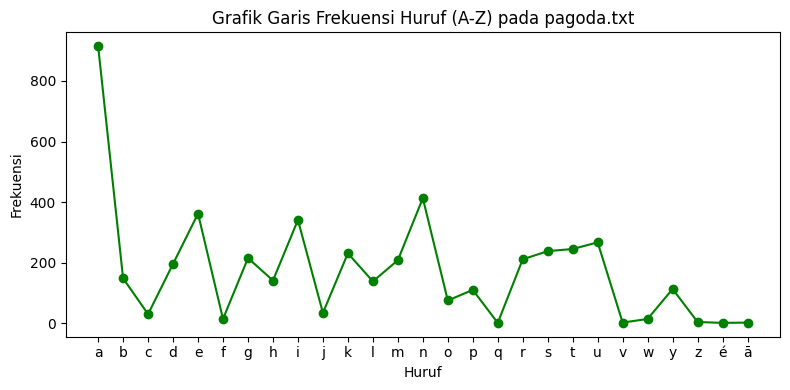

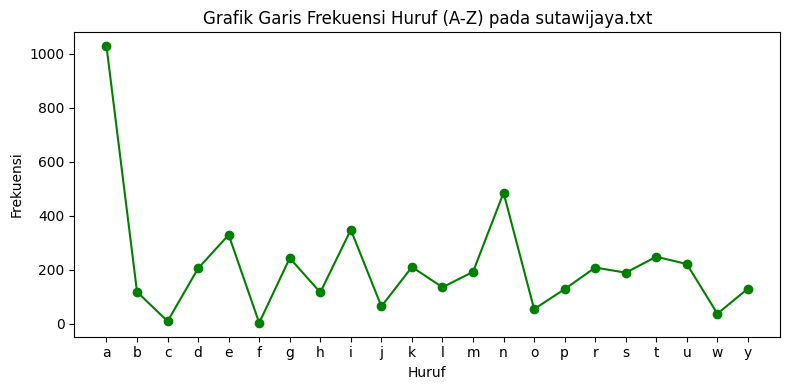

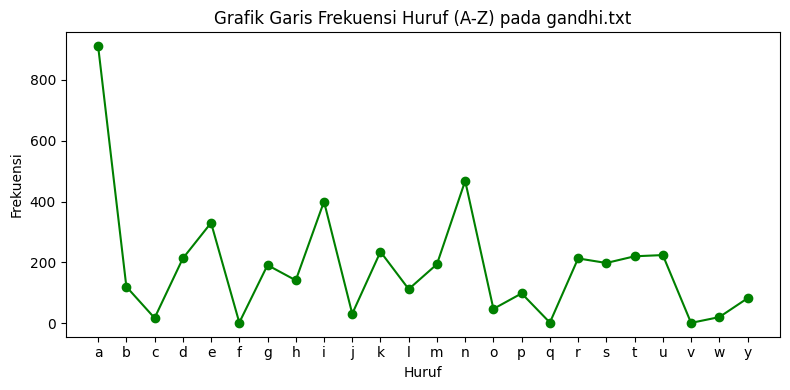

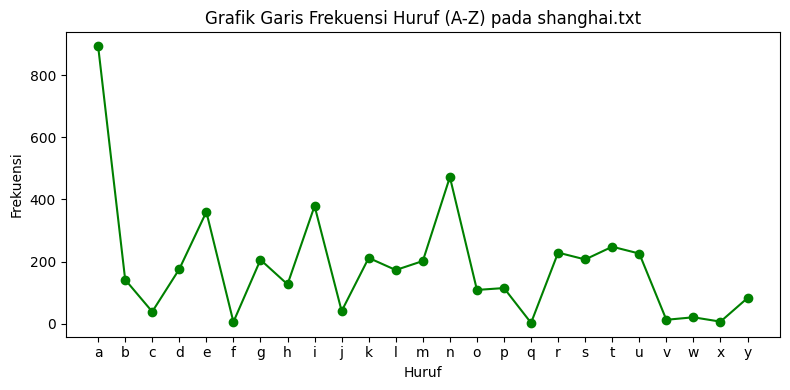

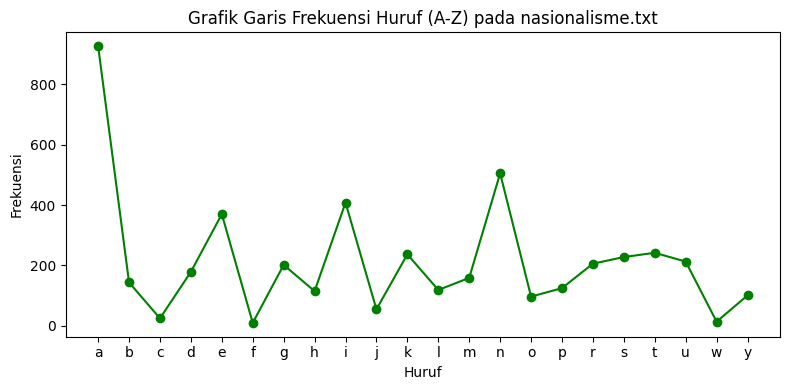

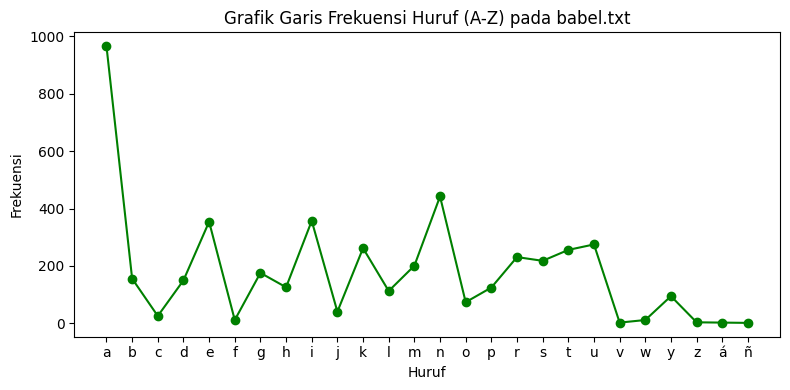

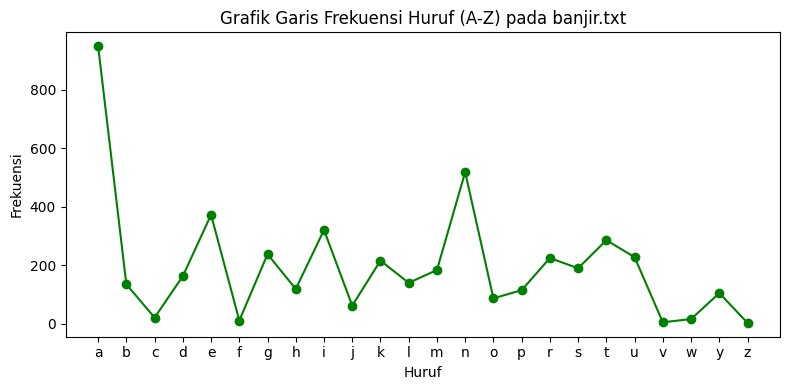

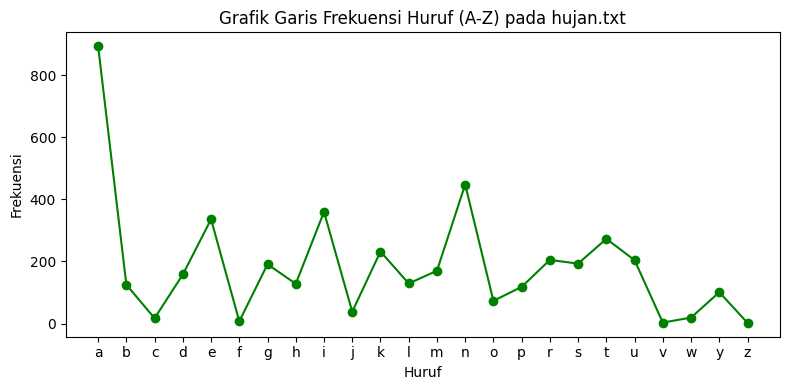

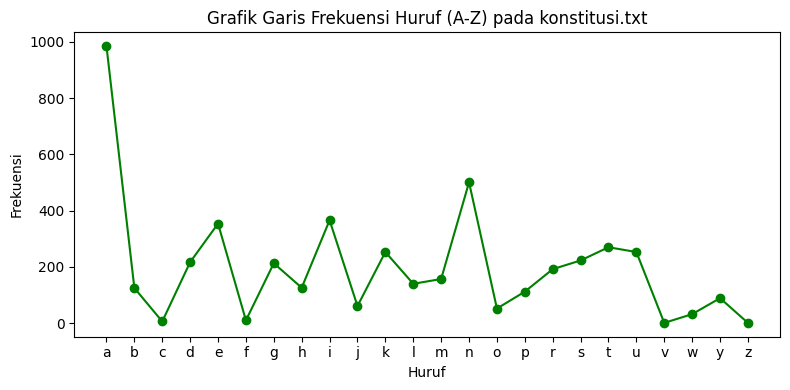

In [ ]:
    letters, letter_counts = zip(*sorted(modus_abjad[i].items()))
    plt.figure(figsize=(8, 4))
    plt.plot(letters, letter_counts, marker='o', color='green', linestyle='-')
    plt.title(f"Grafik Garis Frekuensi Huruf (A-Z) pada {artikel_names[i]}", fontsize=12)
    plt.xlabel("Huruf", fontsize=10)
    plt.ylabel("Frekuensi", fontsize=10)
    plt.tight_layout()
    plt.show()